*Day 4*
# Decision Tree, SVM, KNN Modeling Practice
---

1. Titanic kaggle competition dataset
2. Use Decision Tree with varying depth 1-20
    - gini & entropy criterion
    - min samples leaf 1-20
3. Use KNN with varying k 20
4. SVM with all 4 kernels
5. Compare the accuracy of all the models
    - Use accuracy score
    - Use F1 score

# 1. Load Library & Dataset

In [114]:
#Import Library
## EDA Standard Libary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats as ss

In [115]:
#ML Library

#ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#ML TrainTest Split
from sklearn.model_selection import train_test_split
#ML Report
from sklearn.metrics import  accuracy_score

In [116]:
import warnings
warnings.filterwarnings('ignore')

In [117]:
#Load train dataset
df = pd.read_csv('/Users/Dwika/My Projects/Modul 3 Purwadhika/4-DecisionTree-Practice/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Data Cleaning & Preprocessing

In [118]:
#Construct deep Info on columns & values:

NYCtaxi = []
for i in df.columns:
    NYCtaxi.append([i, df[i].dtypes,
                      df[i].isna().sum(),
                      round((((df[i].isna().sum())/(len(df)))*100),2), 
                    df[i].nunique(), 
                    df[i].sample(3).values])
pd.DataFrame(NYCtaxi, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique','uniqueSample'])


,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,PassengerId,int64,0,0.00,891,"[764, 291, 177]"
1,Survived,int64,0,0.00,2,"[1, 1, 1]"
2,Pclass,int64,0,0.00,3,"[2, 1, 3]"
3,Name,object,0,0.00,891,"[Johannesen-Bratthammer, Mr. Bernt, Montvila, ..."
4,Sex,object,0,0.00,2,"[female, male, male]"
5,Age,float64,177,19.87,88,"[nan, 48.0, 26.0]"
6,SibSp,int64,0,0.00,7,"[1, 1, 3]"
7,Parch,int64,0,0.00,7,"[0, 1, 0]"
8,Ticket,object,0,0.00,681,"[695, SOTON/O.Q. 3101306, 2659]"
9,Fare,float64,0,0.00,248,"[11.1333, 7.25, 8.05]"


From the deep info above, we can see that there are 3 columns with missing values: Age, Cabin, and Embarked. We will handle them one by one.
- Drop columns with more than 50% missing values --> Cabin
- Age --> fill with median
- Embarked --> drop rows with missing values

## 2.1 Check Duplicate Data

In [119]:
# Check Duplicate rows 

df[df.duplicated(keep=False) ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


No duplicated rows

## 2.2 Drop Cabin Columns

In [120]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
#Drop cabin column
df.drop(columns=['Cabin'], inplace=True)

> Cabin column dropped

## 2.3 Fill Missing Values in Age 

<Axes: xlabel='Age', ylabel='Density'>

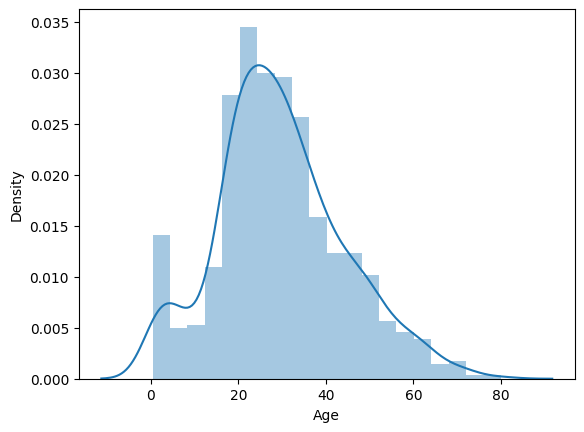

In [122]:
#Check Distribution of Age
sns.distplot(df['Age'])

As the distribution of Age is skewed, we will fill the missing values with median

In [123]:
#Fill missing value of Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

## 2.4 Drop Rows with Missing Values in Embarked

In [124]:
#Check rows with missing values in embarked
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [125]:
#Find index of embarked missing values
embarkedNull = df[df['Embarked'].isna()].index

#drop rows with missing values in embarked
df.drop(index=embarkedNull, inplace=True)

In [126]:
#COnfirm all missing values is cleaned
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

All missing Values Are Cleared

<Axes: >

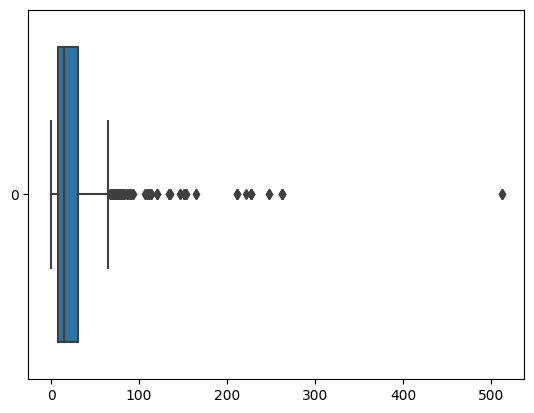

In [127]:
#Check for extreme outliers in Fare
sns.boxplot(data=df['Fare'], orient='horizontal')

We will remove the extreme outliers in Fare

In [128]:
#Remove extreme outliers in Fare
df[df['Fare'] > 300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


In [129]:
#Remove extreme outliers in Fare
df.drop(index=df[df['Fare'] > 300].index, inplace=True)

## 2.5 Reset Index

In [130]:
#Reset index
df.reset_index(drop=True, inplace=True)

# 3. Feature Engineering

## 3.1 Columns Selection

Selecting columns that will be used in modeling and prediction, in this case we will use survived as target classification (y).
And we will drop all other columns that are not needed in the modeling process.

In [131]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


We will only keep columns that are likely to be relevant to the prediction of survival:
- Pclass, Age, SibSp, Parch as Independent variable (x)
- Survived as Dependent variable (y)

In [132]:
#Drop columns that will not be used in modeling
df_model = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Fare', 'Embarked'])


## 3.2 Categorical Encoding

In [134]:
#Check on current data features
HotelBooking = []
for i in df_model.columns:
    HotelBooking.append([i, df_model[i].dtypes,
                         df_model[i].nunique(), 
                    df_model[i].sample(2).values])
pd.DataFrame(HotelBooking, columns = ['dataFeatures', 'dataType', 'unique','uniqueSample'])

                         

,dataFeatures,dataType,unique,uniqueSample
0,Survived,int64,2,"[1, 1]"
1,Pclass,int64,3,"[3, 1]"
2,Sex,object,2,"[male, female]"
3,Age,float64,88,"[58.0, 31.0]"
4,SibSp,int64,7,"[0, 1]"
5,Parch,int64,7,"[0, 1]"


We will convert the categorical feature of Sex into a numerical one.

In [139]:
#Convert all categorical variables (hotel,deposit_type) into dummy numerical
df_ML =  pd.get_dummies(df_model, columns=['Sex'], dtype=int, drop_first=True)
df_ML

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1
...,...,...,...,...,...,...
881,0,2,27.0,0,0,1
882,1,1,19.0,0,0,0
883,0,3,28.0,1,2,0
884,1,1,26.0,0,0,1


**Dummy Variable Notations:**

Converted Sex variable

| Sex | Sex_male | 
| :---       | :--- | 
| Female | 0 |
| Male   | 1 |


# 4. Train Test Split

In [140]:
#Train test split
x = df_ML.drop('Survived', axis=1)  # All cols except default as ind var (x)
y = df_ML['Survived']               # default col as target (y) 

xtrain, xtest, ytrain, ytest = train_test_split(
    x,
    y,
    test_size= 0.2,    # Test Data Size as 20% 
    random_state=20,   # Random seed
    stratify=y         # Proportion between train & test, same propotion as y 
)

# 5. Modeling

## 5.1 Decision Tree

In [141]:
#Modeling with Decision Tree, varying max_depth parameter 
#Create looping

md = np.arange(1, 21,1)
crit = ['gini', 'entropy']
acc_score = []
krit = []

for i in md:
    for j in crit:
        dtc = DecisionTreeClassifier(max_depth=i, criterion=j, random_state=2020)
        dtc.fit(xtrain, ytrain)
        ypred = dtc.predict(xtest)
        acc_score.append(accuracy_score(ytest, ypred))
        krit.append((i,j))

In [142]:
#Create dataframe of result

df_result = pd.DataFrame({'criterion':krit, 'accuracy_score':acc_score})

In [143]:
df_result.sort_values(by='accuracy_score', ascending=False).head(10)

,criterion,accuracy_score
11,"(6, entropy)",0.803371
4,"(3, gini)",0.797753
5,"(3, entropy)",0.797753
6,"(4, gini)",0.797753
7,"(4, entropy)",0.797753
8,"(5, gini)",0.792135
9,"(5, entropy)",0.792135
13,"(7, entropy)",0.792135
10,"(6, gini)",0.786517
27,"(14, entropy)",0.780899


## 5.2 KNN (K-Nearest Neighbors)

In [189]:
#Modelling with kNN, varying n_neighbors parameter 1-20
#Use loops
knn_acc_score = []
kvalues = []
k_score_dictionary = {}

for k in range(1, 21, 2):
    knn_multi_k = KNeighborsClassifier(n_neighbors=k)
    knn_multi_k.fit(xtrain, ytrain)
    # Print report
    pred_knn = knn_multi_k.predict(xtest)
    acc = accuracy_score(ytest, pred_knn)
    kvalues.append(k)  # Append the k value to kvalues
    knn_acc_score.append(acc)  # Append the accuracy to knn_acc_score
    k_score_dictionary[k] = acc  # Store accuracy in the dictionary

# Create a DataFrame to store k-values and their corresponding accuracies
df_knn_score = pd.DataFrame({'k': kvalues, 'accuracy': knn_acc_score})




In [190]:
#Sort knn result by top 10 highest accuracy score
df_knn_score.sort_values(by='accuracy', ascending=False)

,k,accuracy
4,9,0.808989
8,17,0.808989
5,11,0.803371
7,15,0.803371
9,19,0.803371
2,5,0.797753
1,3,0.792135
3,7,0.786517
6,13,0.786517
0,1,0.735955


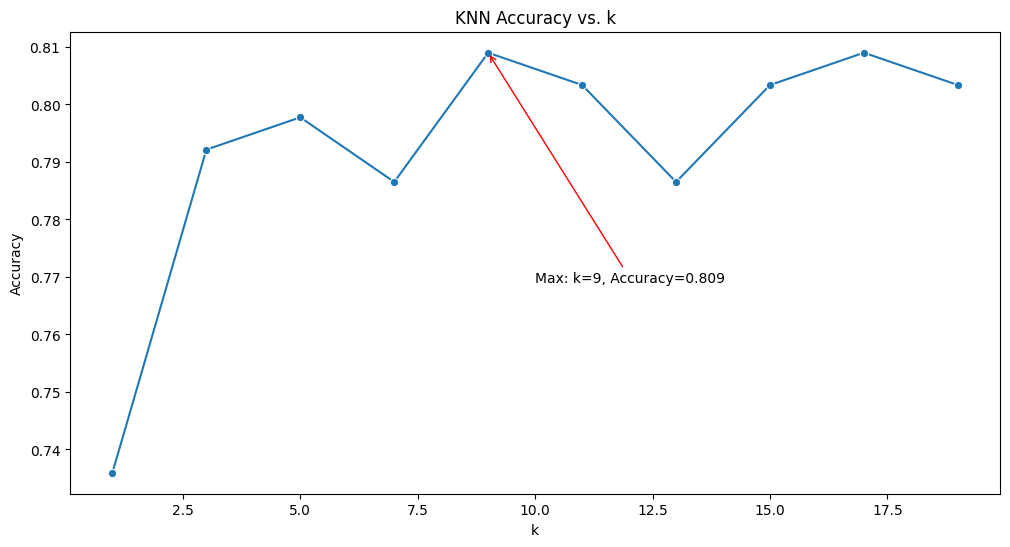

In [197]:
# Find the maximum accuracy and its corresponding 'k' value
plt.figure(figsize=(12,6))
max_accuracy = df_knn_score['accuracy'].max()
max_k = df_knn_score.loc[df_knn_score['accuracy'] == max_accuracy, 'k'].values[0]

# Create the line plot 
sns.lineplot(data=df_knn_score, x='k', y='accuracy', markers=True, marker='o')

# Add a marker for the maximum point
plt.annotate(f'Max: k={max_k}, Accuracy={max_accuracy:.3f}', 
             xy=(max_k, max_accuracy), xytext=(max_k + 1, max_accuracy - 0.04),
             arrowprops=dict(arrowstyle='->', color='red'))
             
# Show the plot
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. k')
plt.show()

## 5.3 SVC (Support Vector Classifier)

In [148]:
#Modelling with svm, varying kernel parameter
#Use loops
svm_acc_score = []
k_score_dictionary = {}

#Kernel types to loop
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Loop over a list of kernel types
for type in kernels:
    SVC_model = SVC(kernel=type)
    SVC_model.fit(xtrain, ytrain)
    # Print report
    pred_SVC = SVC_model.predict(xtest)
    acc = accuracy_score(ytest, pred_SVC)
    svm_acc_score.append(acc)  # Append the accuracy to knn_acc_score
    k_score_dictionary[type] = acc  # Store accuracy in the dictionary
    
# Create a DataFrame to store k-values and their corresponding accuracies
df_svm_score = pd.DataFrame({'kernels': kernels, 'accuracy': svm_acc_score})

In [149]:
#show result
df_svm_score.sort_values(by='accuracy', ascending=False).head(10)

,kernels,accuracy
0,linear,0.769663
2,rbf,0.646067
1,poly,0.617978
3,sigmoid,0.477528


# 6. Evaluation & Conclusion

In [198]:
#Print result for each model with best parameter and  highest accuracy score
print(f"Result for Decision Tree with varying parameter max_depth,criterion={df_result[df_result['accuracy_score'] == df_result['accuracy_score'].max()]['criterion'].values} Acccuracy Score {df_result['accuracy_score'].max()}")
print(f"Result for KNN with varying parameter k={df_knn_score[df_knn_score['accuracy'] == df_knn_score['accuracy'].max()]['k'].values} Acccuracy Score {df_knn_score['accuracy'].max()}")
print(f"Result for SVC with varying kernel, kernel={df_svm_score[df_svm_score['accuracy'] == df_svm_score['accuracy'].max()]['kernels'].values} Acccuracy Score {df_svm_score['accuracy'].max()}")


Result for Decision Tree with varying parameter max_depth,criterion=[(6, 'entropy')] Acccuracy Score 0.8033707865168539
Result for KNN with varying parameter k=[ 9 17] Acccuracy Score 0.8089887640449438
Result for SVC with varying kernel, kernel=['linear'] Acccuracy Score 0.7696629213483146


> ### In conclusion, from 3 model that we have tried, KNN has the highest accuracy score. So we will use KNN as our final model.